***
<font size=+2>ID: **AI-0009**</font><br>
<font size=+2>Submission Date: **16-01-2018**</font>
***

## Abstract:
<font size=+0.5>**"Digit Recognizer"**</font><br>
MNIST ("Modified National Institute of Standards and Technology") is the basic Dataset of Computer Vision. This classic Dataset of Handwritten Images has served as the basis for benchmarking Classification Algorithms. While Digit Recognition is the ultimate goal, this project consists of several segments such as Data Set Analysis, Data Preprocessing, Decision of Algorithm and Model, Decision of Hyper Parameters. CNN(Convolution Neural Network) has been the main focus throughout the development. For Generalization and Robustness  of the Model, Data Augmentation was fitted. The use of Conv2D and MaxPool2D Layers in the Convolution Network was well utilized and a sustainable Model was established. Hyper Parameter Tuning played an important role in improving the Final Score. “Style Guide for Python Code PEP8” was considered as the Coding Style. 

## Purpose of the Assignment:
The purpose of the Assignment is to dig into Computer Vision Fundamentals including simple Neural Networks to Convolution Neural Network(CNN) and exploring the Classification Methods. The Goal in this Assignment is to take an Image of a Handwritten single Digit, and determine what that Digit is.
***

In [1]:
%%javascript
IPython.Cell.options_default.cm_config.lineNumbers = false;
IPython.OutputArea.prototype._should_scroll = function(lines) 
{
    return false;
} 
// This code snippet is used to turn off auto scrolling in outputs
// Ignore this snippet as it is not a part of the project

<IPython.core.display.Javascript object>

## 1. Data Set Analysis

### 1.1 Overview

In [18]:
# Digit Recognizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb

np.random.seed(24)

# Data Import
DRtrn = pd.read_csv('train(DR).csv')  # Train Data
DRtst = pd.read_csv('test(DR).csv')  # Test Data

# Missing Values

# Train Set
if (DRtrn.isnull().sum().sum() == 0):
    print('\nNo Missing Values found in the Train Set.')
else:
    print('\Missing Values found in the Train Set.')

# Test Set
if (DRtst.isnull().sum().sum() == 0):
    print('\nNo Missing Values found in the Test Set.')
else:
    print('\Missing Values found in the Test Set.')

# Counts
print('\nTotal Data in Train Set:', len(DRtrn))
print('\nTotal Data in Test Set:', len(DRtst))
print('\nFeature Size:', len(DRtst.values[0]))
size = int((len(DRtst.values[0])**(1/2)))
print('\nImage Size: %d X %d Pixels' % (size,size))


No Missing Values found in the Train Set.

No Missing Values found in the Test Set.

Total Data in Train Set: 42000

Total Data in Test Set: 28000

Feature Size: 784

Image Size: 28 X 28 Pixels


<h2>Cell Report:</h2><br>
**1.** No Missing Values were found.<br>
**2.** Data Counts, Feature Size and Image Size were shown.

### 1.2 Visualization


Allocation of Digits in the Train Set:
    Counts
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188


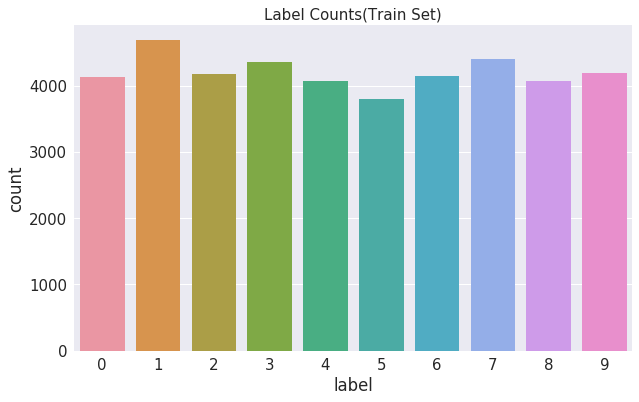

In [19]:
# Allocation
Allocation = DRtrn['label'].value_counts(sort = False).to_frame(name = 'Counts')
print('\nAllocation of Digits in the Train Set:\n', Allocation)

# Bar Plot of Label Counts
plt.figure(1, figsize=(10,6))
plt.title('Label Counts(Train Set)', fontsize=15)
sb.set({'axes.grid' : True}, font_scale=1.5, style='darkgrid')
sb.set(font_scale=1.5)
sb.countplot(DRtrn['label'])
plt.show()

<h2>Cell Report:</h2><br>
**1.** Allocation of Digits in the Train Set was represented.<br>
**2.** Label Counts(Train Set) were Visually represented.<br>
**3.** Visual Representation shows that the 10 digits have approximately similar counts. This indicates that Imbalanced Learning(Under-Sampling or Over-Sampling) is not required. 

## 2. Data Preprocessing

### 2.1 Data Cleansing

In [4]:
# Label Separation
DRtrnY = DRtrn['label']

# Label Dropping
DRtrnX = DRtrn.drop('label', axis=1)
del DRtrn  # Deleting unnecessary Variable as Data is large

<h2>Cell Report:</h2><br>
**1.** Labels were separated from the Train Data and stored.

### 2.2 Data Normalization / Standardization

In [5]:
# Normalization
N = DRtrnX.values[0].max()
DRtrnX = DRtrnX / N
DRtstX = DRtst / N
print('\nNormalized by:', N)
del DRtst  # Deleting unnecessary Variable as Data is large


Normalized by: 255


<h2>Cell Report:</h2><br>
**1.** A Grayscale Normalization was performed to reduce the effect of Intensity Differences. Moreover, CNN converges faster on [0....1] Data than on [0....255]

### 2.3 Feature Engineering(Reshape)


Shape of Train Data: (42000, 28, 28, 1)
Shape of Test Data : (28000, 28, 28, 1)

Sample Images(Train Set):
-------------------------


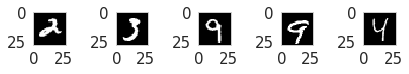

In [6]:
# Saving the Flattened Data for ANN
DRtrnRX = DRtrnX.copy()
DRtstRX = DRtstX.copy()

# Reshape in 3D(Height=28, Width=28, Channel=1)
DRtrnRX = DRtrnRX.values.reshape(-1, 28, 28, 1)
DRtstRX = DRtstRX.values.reshape(-1, 28, 28, 1)

print('\nShape of Train Data:', DRtrnRX.shape)
print('Shape of Test Data :', DRtstRX.shape)

# Sample Image View

# Train Set
print('\nSample Images(Train Set):')
print('-------------------------')
plt.figure(2)
with sb.axes_style('whitegrid', {'axes.grid' : False}):
    for i in range(1,6):
        plt.subplot(1,5,i)
        plt.imshow(DRtrnRX[i*4010][:, :, 0], cmap='gray')
    plt.tight_layout()
    plt.show()

<h2>Cell Report:</h2><br>
**1.** All the Data were Reshaped into Numpy 3D Array (28 X 28 X 1) as Keras requires an extra Dimension at the end which corresponds to Channel. MNIST Images are Gray Scaled so it uses only one Channel.<br>
**2.** Some Sample Images were shown.

### 2.4 One Hot Encoding(Label)

In [7]:
from keras.utils.np_utils import to_categorical

# Saving the Original Labels for ANN
DRtrnRY = DRtrnY.copy()

# One Hot Encoding of Labels
DRtrnRY = to_categorical(DRtrnRY)
print('\nShape of Label Data:', DRtrnRY.shape)
print('Example of a Label:', DRtrnRY[1000])

Using TensorFlow backend.



Shape of Label Data: (42000, 10)
Example of a Label: [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


<h2>Cell Report:</h2><br>
**1.** Labels were One Hot Encoded as it is required by Keras.<br>
**2.** Example: 5 would be [0,0,0,0,0,1,0,0,0,0]

### 2.5 Data Augmentation

In [8]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

DataGen = ImageDataGenerator(featurewise_center=False,  # Set Input Mean to 0 over the Dataset
                             samplewise_center=False,   # Set each Sample Mean to 0
                             featurewise_std_normalization=False,  # Divide Inputs by STD of the Dataset
                             samplewise_std_normalization=False,   # Divide each Input by its STD
                             zca_whitening=False,  # ZCA whitening
                             rotation_range=10,    # Randomly rotate Images
                             zoom_range = 0.1,     # Randomly zoom Images 
                             width_shift_range=0.1,   # Randomly shift Images horizontally (fraction of total width)
                             height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height)
                             horizontal_flip=False,   # Randomly flip Images(Horizontal)
                             vertical_flip=False)     # Randomly flip Images(Vertical)

<h2>Cell Report:</h2><br>
**1.** In order to avoid Overfitting problem, Handwritten Digit Dataset was expanded artificially. Existing Dataset can be made even larger by Data Augmentation. The idea is to alter the Training Data with small Transformations to reproduce the variations occuring when someone is writing a Digit.<br>
**2.** Approaches that alter the Training Data in ways that change the Array Representation while keeping the Label same are known as Data Augmentation Techniques.<br>
**3.** Data Augmentation helps making the Model more Generic and Robust.<br>
**4.** In this Model, Some Training Images were randomly rotated by 10 Degrees.<br>
**5.** Some Training Images were randomly Zoomed by 10%.<br>
**6.** Some Images were randomly shifted horizontally by 10% of the width.<br>
**7.** Some Images were randomly shifted vertically by 10% of the height.<br>
**8.** The Augmentation was fitted to the Train Data in a later Cell.

## 3. Decision of Algorithm and Model

### 3.1 Scikit Learn(ANN)

In [9]:
# Learner(Vanilla/Basic Model)
import sklearn.neural_network as sknn
import sklearn.model_selection as mods
import warnings
warnings.filterwarnings('ignore')

modelSK = sknn.MLPClassifier(hidden_layer_sizes=(800,500,200), activation='relu', solver='adam', alpha=0.1, max_iter=20)
CVS = mods.cross_val_score(modelSK, DRtrnX, DRtrnY, cv=3)  # Cross Validation Scores
modelSK = modelSK.fit(DRtrnX, DRtrnY)
PredDR = modelSK.predict(DRtstX)
print('\nAverage Accuracy Score(5 Fold Cross Validation):', sum(CVS)/3)

# Data Frame
ImageId = [i for i in range(1,28001)]
ImageId = np.asarray(ImageId)
PredSKDR = PredDR.flatten()
PredSKDR = pd.DataFrame({'ImageId':ImageId, 'Label':PredSKDR})

# CSV File(Kaggle Format)
PredSKDR.to_csv('PredSKDR(Vanilla).csv', index=False)


Average Accuracy Score(5 Fold Cross Validation): 0.964642263948


<h2>Cell Report:</h2><br>
**1.** A Vanilla/Basic Model was represented with Neural Network. Scikit Learn's ANN was used for this Traditional Model. Hyper Parameters were tuned manually.<br>
**2.** A 5 Fold Cross Validation was run on the Train Data and the Average Accuracy Score(R2 Score) was shown.<br>
**3.** Kaggle Score: 0.96<br>
**4.** For Image Classification, CNN gives much better result over ANN because of the Convolutional Filtering operation. Convolutional Neural Networks allow Networks to have fewer weights. This guides the learning towards better predictions. For instance, Images contain a lot of redundant information and that for object recognition, edges are often all we need. This insight helps to give the Neural Network a simple way to do edge detection through Convolution. This is why ConvNets are used for most Computer Vision Deep Learning tasks as it makes use of Local Patterns of the Data. CNN helps extracting Features that are very effective for accurate predictions.<br>
**5.** For the later Models, CNN was used.

### 3.2 Keras(CNN): Number of Layers, Regularization(Dropout, Batch Normalization)

In [10]:
# Learner(CNN)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

model = Sequential()

# Stack of Layers(Convolution)
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

# Stack of Layers(NN)
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

<h2>Cell Report:</h2><br>
**1.** Two Conv2D layers with 32 Filters were added first to the Model followed by one MaxPool2D layer and a Dropout layer. Then two more Conv2D layers with 64 Filters were added followed by one MaxPool2D layer and a Dropout layer.<br>
**2.** Each Filter transforms a part of the Image(defined by the Kernel Size).<br>
**3.** The CNN can isolate Features that are useful everywhere from these Transformed Images.<br>
**4.** MaxPool2D layer is important in CNN as this layer simply acts as a Downsampling Filter. It looks at the neighboring pixels and picks the maximum value. These are used to reduce Computational Cost and to some extent also to reduce Overfitting.<br>
**5.** Combining Convolutional and Pooling Layers, CNN are able to combine Local Features and learn more Global Features of the Image.<br>
**6.** Dropout is a Regularization Method where a proportion of Nodes in the layer are randomly ignored. It forces the Network to learn Features in a distributed way. This technique also improves Generalization and reduces the Overfitting.<br>
**7.** The Flatten layer is used to convert the Final Feature maps into a single 1D Vector. This flattening step produces fully connected layers. It combines all the Local Features of the previous Convolutional Layers.<br>
**8.** Finally two Dense Layers with Batch Normalization and Dropout were used as ANN Classifier.

## 4. Decision of Hyper Parameters

### 4.1 Epochs

In [11]:
# Epochs
epochs = 50
batch_size = 86

<h2>Cell Report:</h2><br>
**1.** Number of epochs was tuned manually. Considering the Computational Power available, Number of epochs was kept at a moderate level. Powerful Computers with Nvidia GPU can run higher Number of epochs within a short time.<br>
**2.** Batch Size was also tuned.

### 4.2 Activation Function(Grid Search)

In [12]:
# Grid Search for the best Activation Function
from sklearn.model_selection import GridSearchCV

# Available Activation Functions
Activations = ['identity', 'logistic', 'tanh', 'relu']

# Model to Grid Search
modelAct = sknn.MLPClassifier(hidden_layer_sizes=(800,500,200), alpha=0.1, max_iter=4)
grid = GridSearchCV(estimator=modelAct, param_grid=dict(activation = Activations))
grid.fit(DRtrnX, DRtrnY)
print('\nGrid Summary:\n', grid)

# Summary(Tuned Hyperparameter)
print('\nBest Score:', grid.best_score_)
print('Best Activation Function:', grid.best_estimator_.activation)


Grid Summary:
 GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(800, 500, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=4, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best Score: 0.963404761905
Best Activation Function: relu


<h2>Cell Report:</h2><br>
**1.** The Grid Search for the best Activation Function was a guideline for the Final Model.<br>
**2.** As the Grid Search was run, best Activation Function was found to be 'relu' which ought to be used in the Dense Layer.<br>
**3.** But in the Final Dense Layer, 'softmax' is preferable as it is a Classification Problem.<br>
**4.** For the Convolution Layers, Activation Functions were manually tuned. 

### 4.3 Optimizer

In [13]:
# Optimizer
from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

<h2>Cell Report:</h2><br>
**1.** 'RMSprop' was used as Optimizer as it is a very effective Optimizer. The 'RMSprop' updates and adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing Learning Rate. 'sgd' could have been used but it is slower than 'RMSprop'.<br>

### 4.4 Learning Rate

In [14]:
# Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
LRA = ReduceLROnPlateau(monitor = 'val_acc', 
                        patience = 5, 
                        verbose = 1, 
                        factor = 0.5, 
                        min_lr = 0.00001)

<h2>Cell Report:</h2><br>
**1.** In order to make the Optimizer converge faster and closest to the Global Minimum of the Loss Function, an Annealing Method of the Learning Rate(LR) was used because it's better to have a decreasing Learning Rate during the Training to reach efficiently the Global Minimum of the Loss Function.<br>
**2.** With the ReduceLROnPlateau function from Keras.callbacks, it was chosen to reduce the LR by half if the Accuracy is not improved after 5 epochs.

### 4.5 Number of Neurons

**Note:** After adding the Flattening Layer, 2 Dense Layers with Neurons (256, 10) were added. In the final Layer, 10 Neurons ought to be added as there are 10 Classes(Digits from 0 to 9).

***

<h2>Summary of Hyper Parameter Tuning:</h2><br>
1. Epochs: 50<br>
2. Activation Function: 'relu' for the First Dense Layer and Convolution Layers, 'softmax' for the Final Dense Layer.<br>
3. Optimizer: 'RMSprop'<br>
4. Learning Rate(alpha): Annealing Method<br>
5. Number of Neurons: (256, 10)<br>

**Note:** More epochs could have improved the Final Score but due to limitations of Available Computational Power, it was not affordable. 

***

## 5. Best Designed Model(Tuned Hyper Parameters)

Epoch 1/50
11s - loss: 0.2387 - acc: 0.9246 - val_loss: 0.1358 - val_acc: 0.9676
Epoch 2/50
10s - loss: 0.0957 - acc: 0.9701 - val_loss: 0.0641 - val_acc: 0.9836
Epoch 3/50
10s - loss: 0.0745 - acc: 0.9765 - val_loss: 0.0477 - val_acc: 0.9838
Epoch 4/50
10s - loss: 0.0660 - acc: 0.9794 - val_loss: 0.0267 - val_acc: 0.9929
Epoch 5/50
10s - loss: 0.0593 - acc: 0.9822 - val_loss: 0.0498 - val_acc: 0.9864
Epoch 6/50
10s - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0279 - val_acc: 0.9914
Epoch 7/50
10s - loss: 0.0496 - acc: 0.9848 - val_loss: 0.0229 - val_acc: 0.9940
Epoch 8/50
10s - loss: 0.0471 - acc: 0.9860 - val_loss: 0.0208 - val_acc: 0.9940
Epoch 9/50
10s - loss: 0.0467 - acc: 0.9864 - val_loss: 0.0229 - val_acc: 0.9943
Epoch 10/50
10s - loss: 0.0450 - acc: 0.9866 - val_loss: 0.0219 - val_acc: 0.9948
Epoch 11/50
10s - loss: 0.0403 - acc: 0.9877 - val_loss: 0.0156 - val_acc: 0.9952
Epoch 12/50
10s - loss: 0.0401 - acc: 0.9880 - val_loss: 0.0208 - val_acc: 0.9936
Epoch 13/50
10s - loss: 0

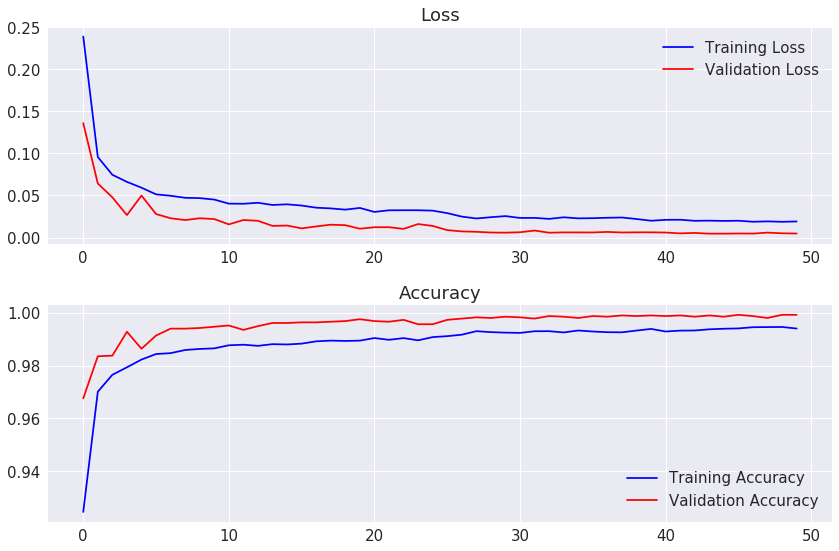

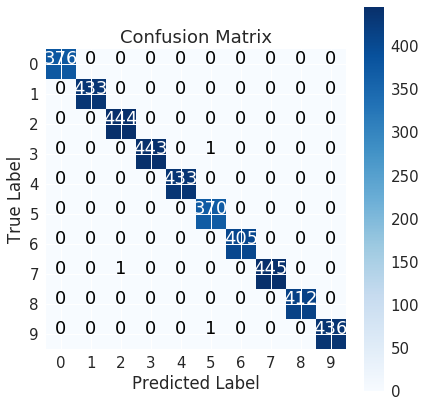

In [15]:
# Model(Final):
from sklearn.metrics import confusion_matrix
import itertools

# Compile
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Augmented Data Fit
DataGen.fit(DRtrnRX)

# Validation Split
X_train, X_val, Y_train, Y_val = mods.train_test_split(DRtrnRX, DRtrnRY, test_size = 0.1, random_state=24, stratify=DRtrnRY)

# Training of Model
MFinal = model.fit_generator(DataGen.flow(DRtrnRX, DRtrnRY, batch_size = batch_size),
                             epochs = epochs, 
                             validation_data = (X_val,Y_val),
                             verbose = 2, 
                             steps_per_epoch = DRtrnRX.shape[0] // batch_size,
                             callbacks = [LRA])

# Training and Validation Curves
plt.figure(3, figsize=(12,8))

plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(MFinal.history['loss'], color='b', label='Training Loss')
plt.plot(MFinal.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='best', shadow=True)

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(MFinal.history['acc'], color='b', label='Training Accuracy')
plt.plot(MFinal.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()


# Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the Confusion Matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Predict the values from the Validation Dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to One Hot Vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

# Convert validation observations to One Hot Vectors
Y_true = np.argmax(Y_val, axis = 1) 

# Compute the Confusion Matrix
CFMtx = confusion_matrix(Y_true, Y_pred_classes)

# Confusion Matrix Plot
plt.figure(4, figsize=(6,6))
plot_confusion_matrix(CFMtx, classes = range(10))

# Predictions
PredDR = model.predict(DRtstRX)
PredDR = np.argmax(PredDR, axis = 1)

# Data Frame
ImageId = [i for i in range(1,28001)]
ImageId = np.asarray(ImageId)
PredDR = PredDR.flatten()
PredDR = pd.DataFrame({'ImageId':ImageId, 'Label':PredDR})

# CSV File(Kaggle Format)
PredDR.to_csv('PredDR(MFinal).csv', index=False)

<h2>Cell Report:</h2><br>
**1.** Best Designed Model was represented.<br>
**2.** Tuned Hyper Parameters had been used in Keras with TensorFlow backend.<br>
**3.** Train and Validation curves show that the Model was well trained with negligible Overfitting.<br>
**4.** Confusion Matrix(Validation Set) was represented. Confusion Matrix shows that the probable errors occur due to different Handwriting. For example 3 is sometime indistinguishable from 8. Other errors are also visible in the Heatmap.<br>
**5.** Kaggle Score: 0.99671

## 6. Results
**1.** Final Kaggle Score(Best Designed Model): 0.99671(Top 6.1% at the time of Submission).<br>
**2.** The Submission File(Predicted Outputs) has been attached.<br> 
**3.** A Sample Output has been shown below.

### 6.1 Sample Output

In [16]:
# Sample Output
PredDR = pd.read_csv('PredDR(MFinal).csv')
print('\nSample Output(20 Predictions):\n')
print(PredDR.head(20))


Sample Output(20 Predictions):

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      0
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


### 6.2 Kaggle Score(Screen Shot)

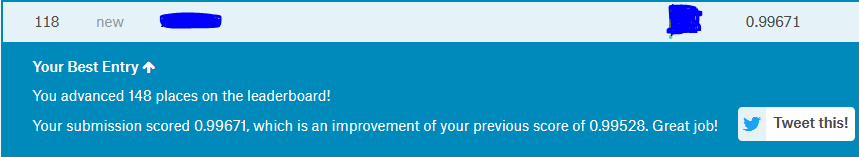

In [2]:
# Kaggle Score(Screen Shot)
from IPython.display import Image
Image('Kaggle.PNG')

**Kaggle Position:** 118 (At the time of Submission). Top 6.1%

## 7. Discussion
**1.** Some bad Handwriting caused erroneous Training of the Model. This resulted in some errors although they are negligible.<br>
**2.** Data Augmentation was attempted to overcome this problem and to make a Generic and Robust Model.<br>
**3.** Learning Rate Annealing impressively helped improving the Final Score.

## 8. Conclusions

**Training Set Size:** The quality of a Learned System is primarily dependent on the size and quality of the Train Set.<br>
**Convolution Neural Network:** Standard Neural Networks are State of the Art Classifiers that perform about as well as other Classification Techniques that operate on Vectors without knowledge of the Input Topology. However, CNN exploit the knowledge that the Inputs are not independent elements but arise from a Spatial Structure.